<a href="https://colab.research.google.com/github/acarty9999/IDS-HW1/blob/main/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REPORT (code below section)**

### **Problem 1 (Python)**

**1) Use dataset about adults**

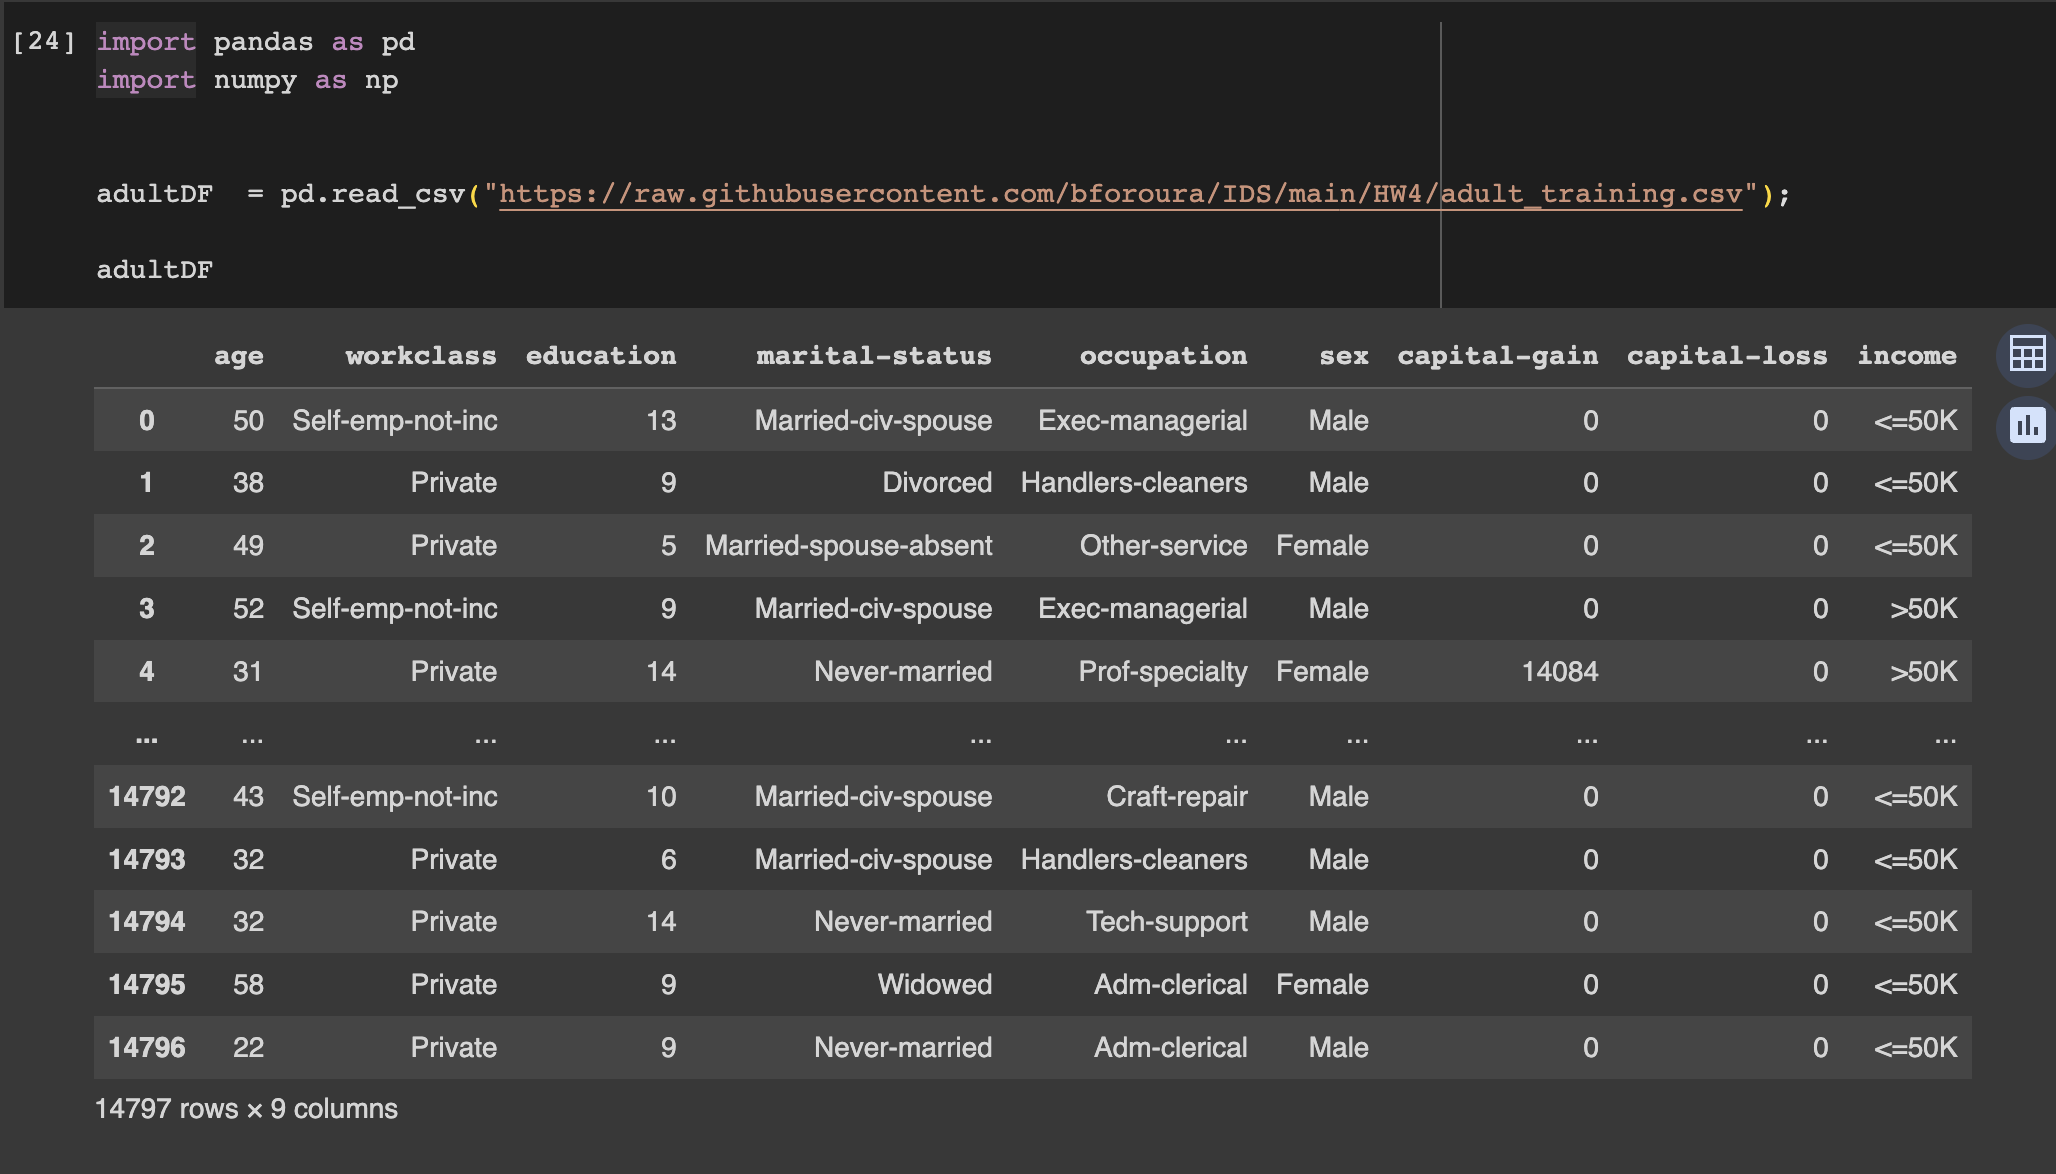

**2) Create a contingency table of workclass and sex, and plot it**

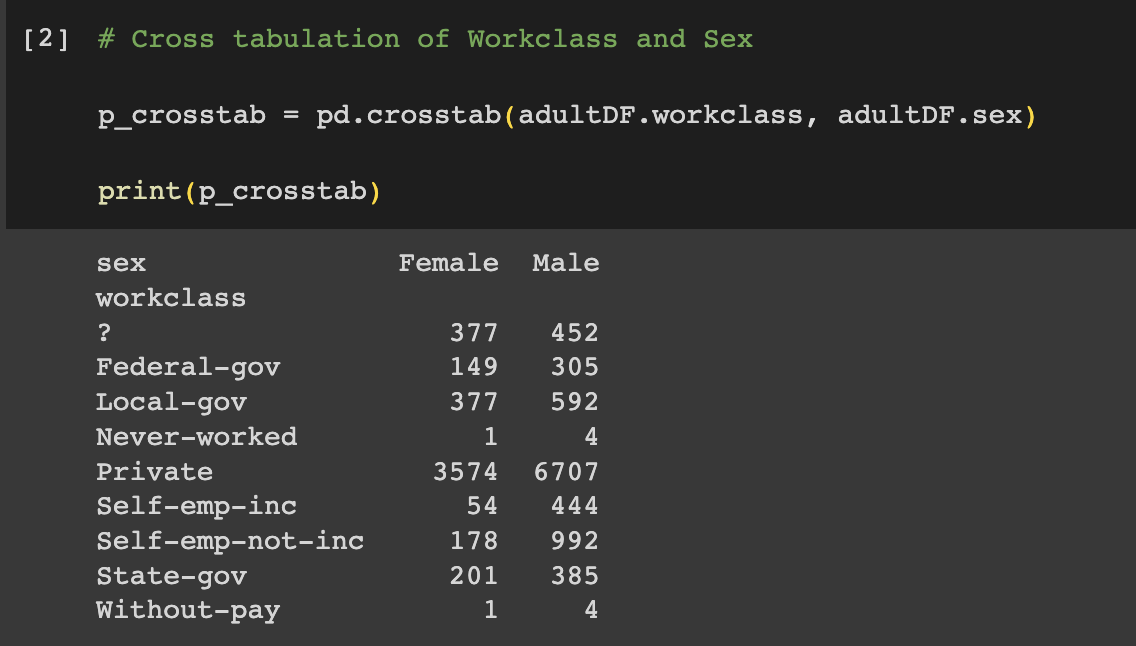

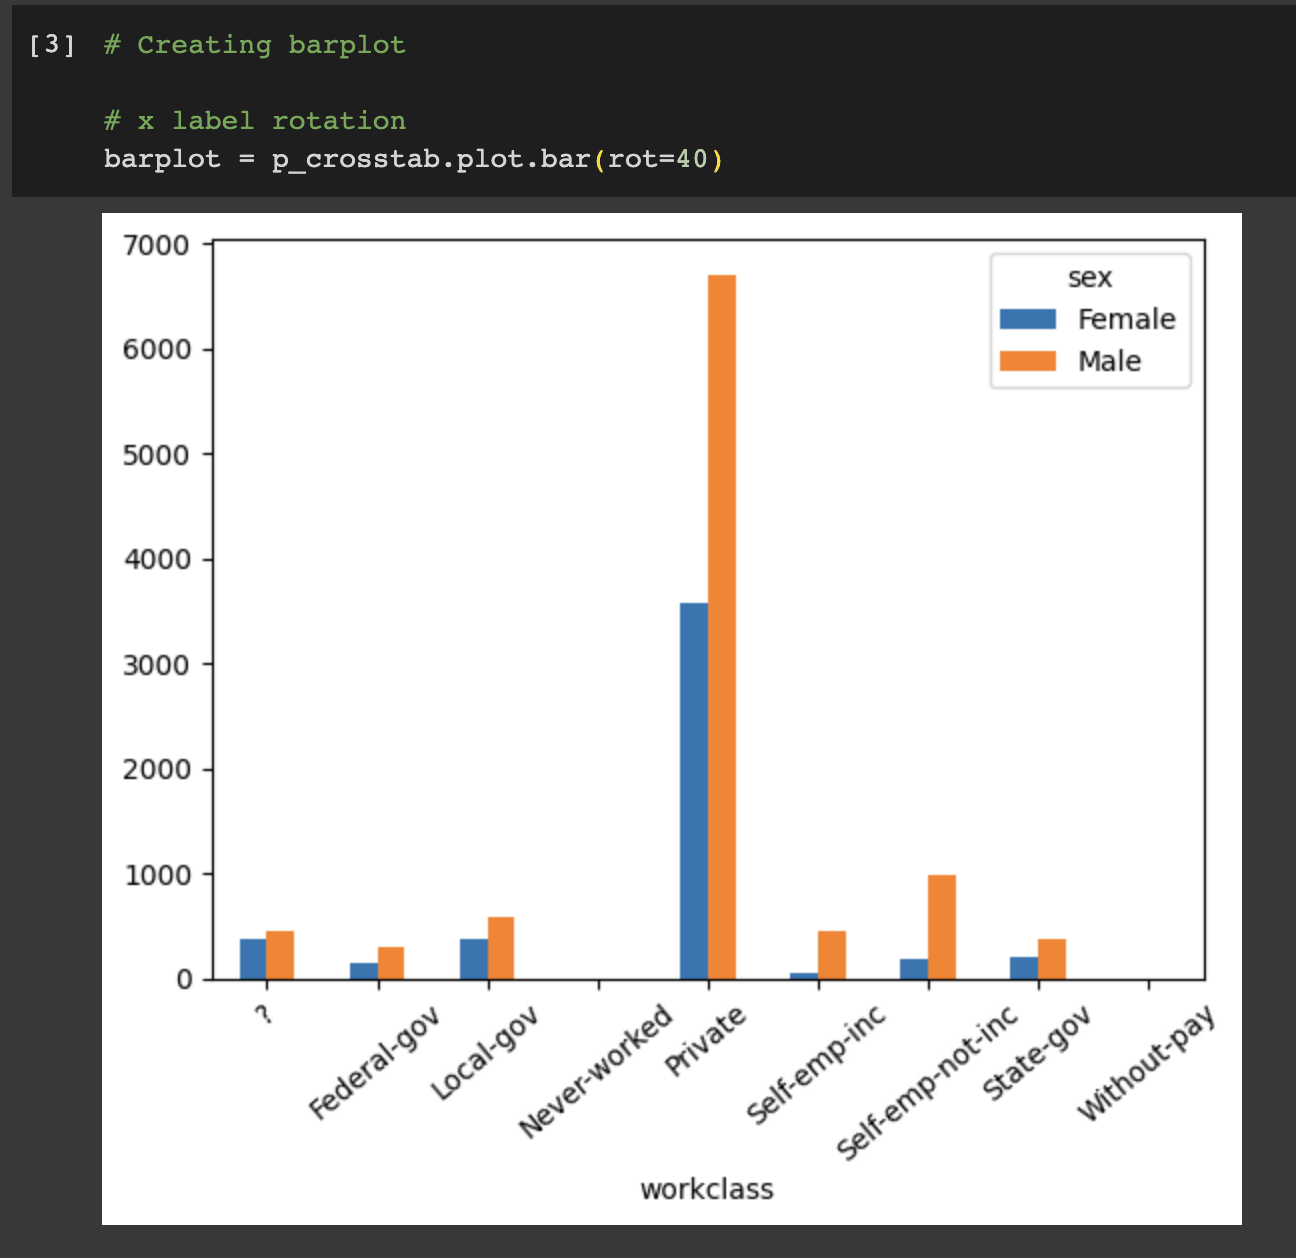

**3) Create a contingency table of sex and marital status, and plot it.**

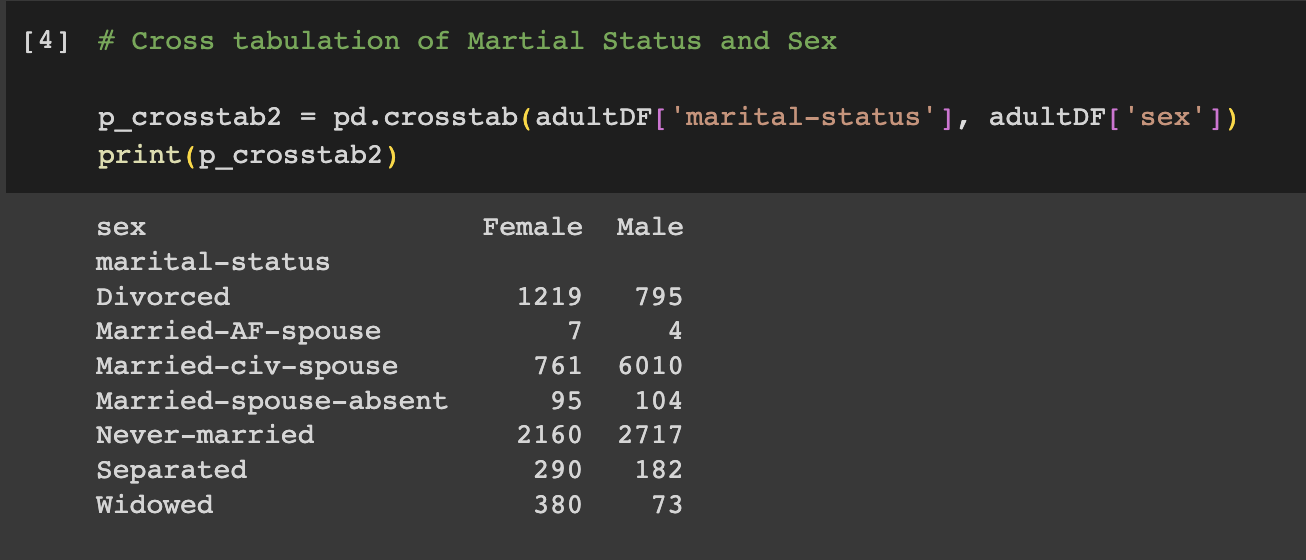

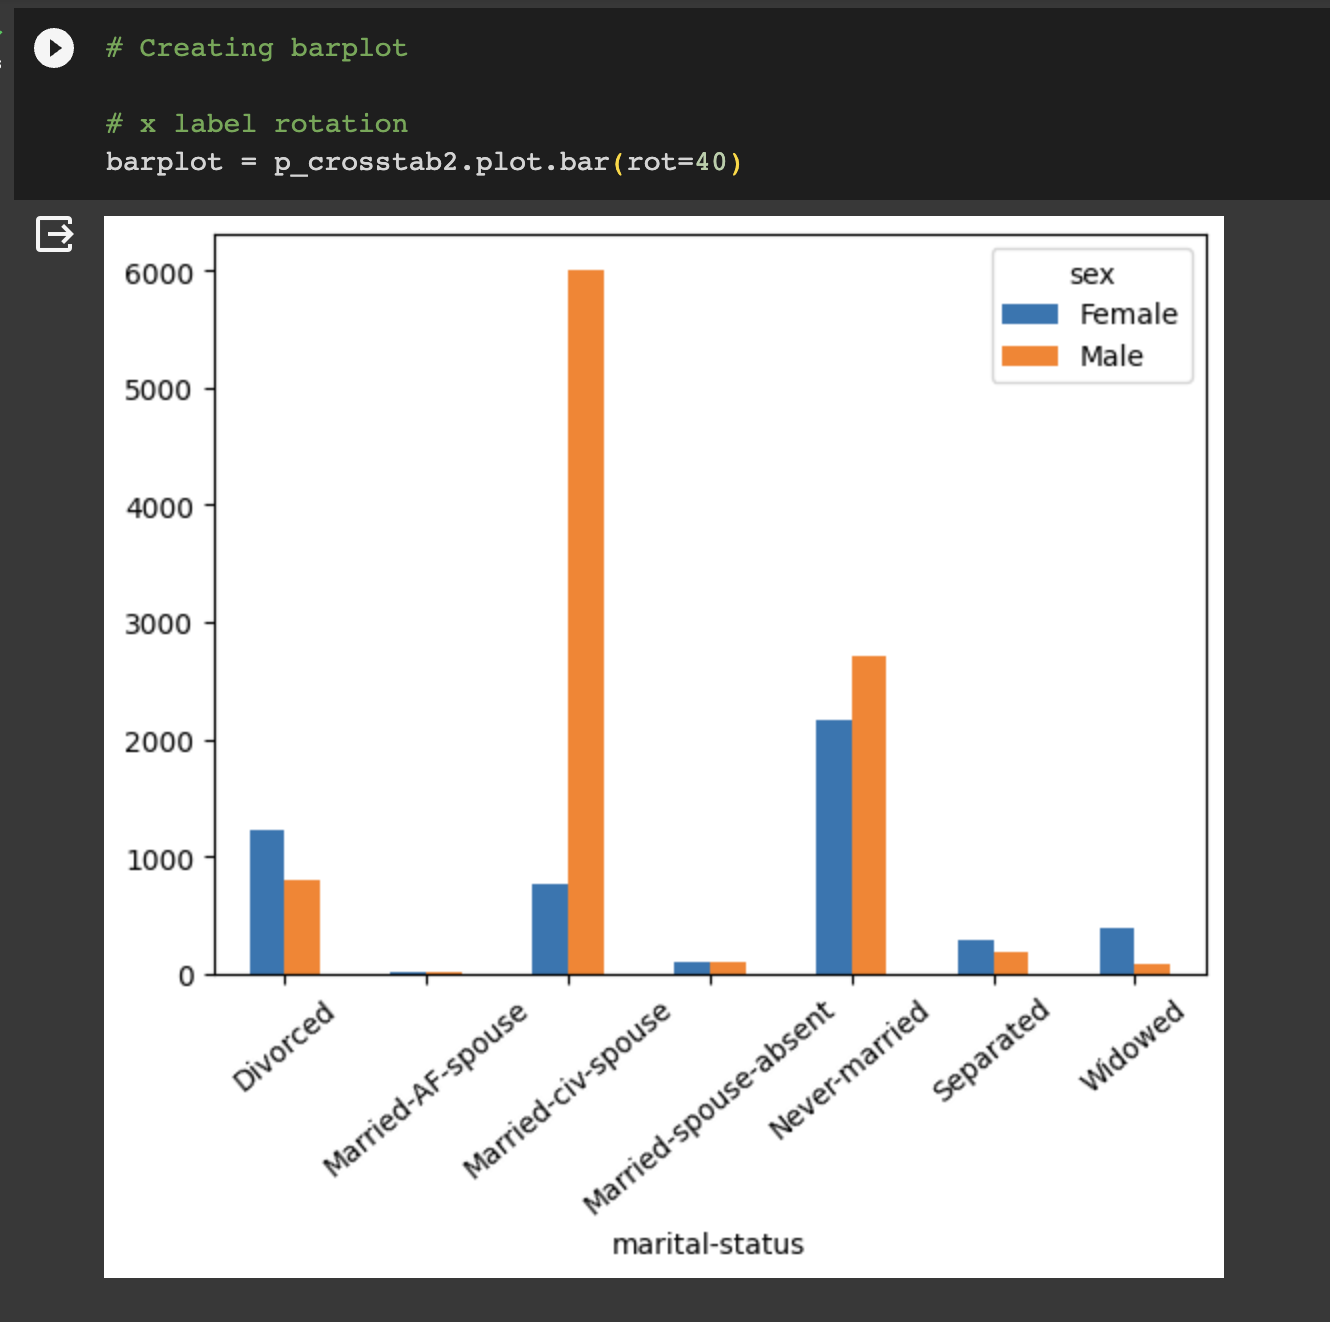

**4) Create a new data frame, adultOver40, for those whose age > 40.**

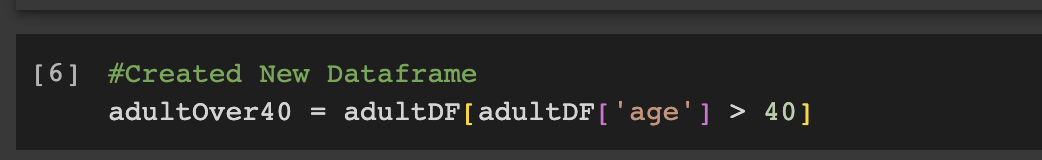

**5) Recreate the contingency table of sex and marital status for adultOver40.**

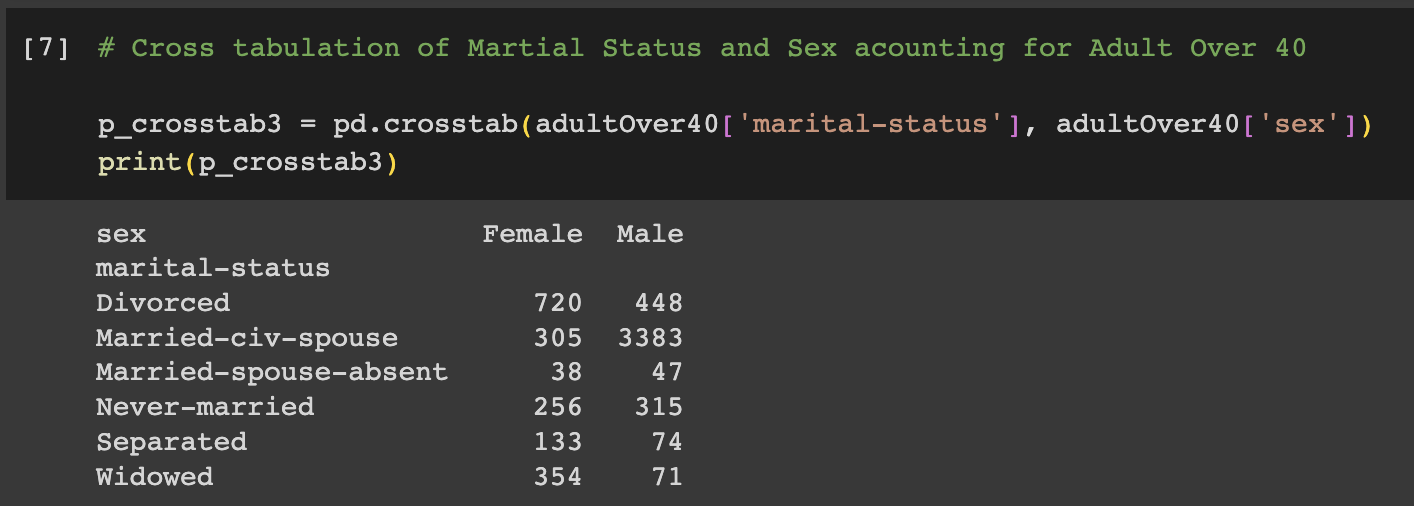

**6) Determine whether any outliers exist for the education field**

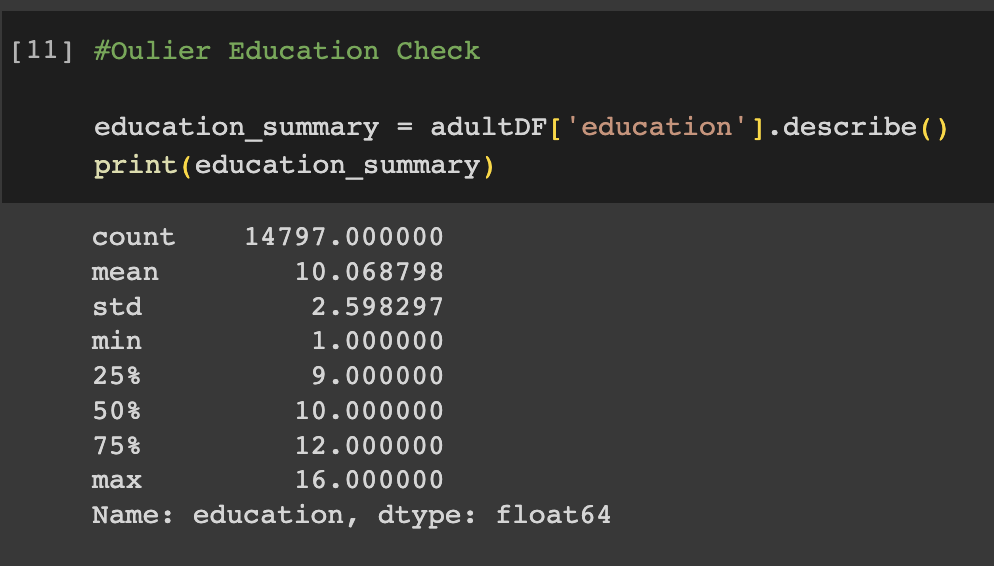

**7) Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?**

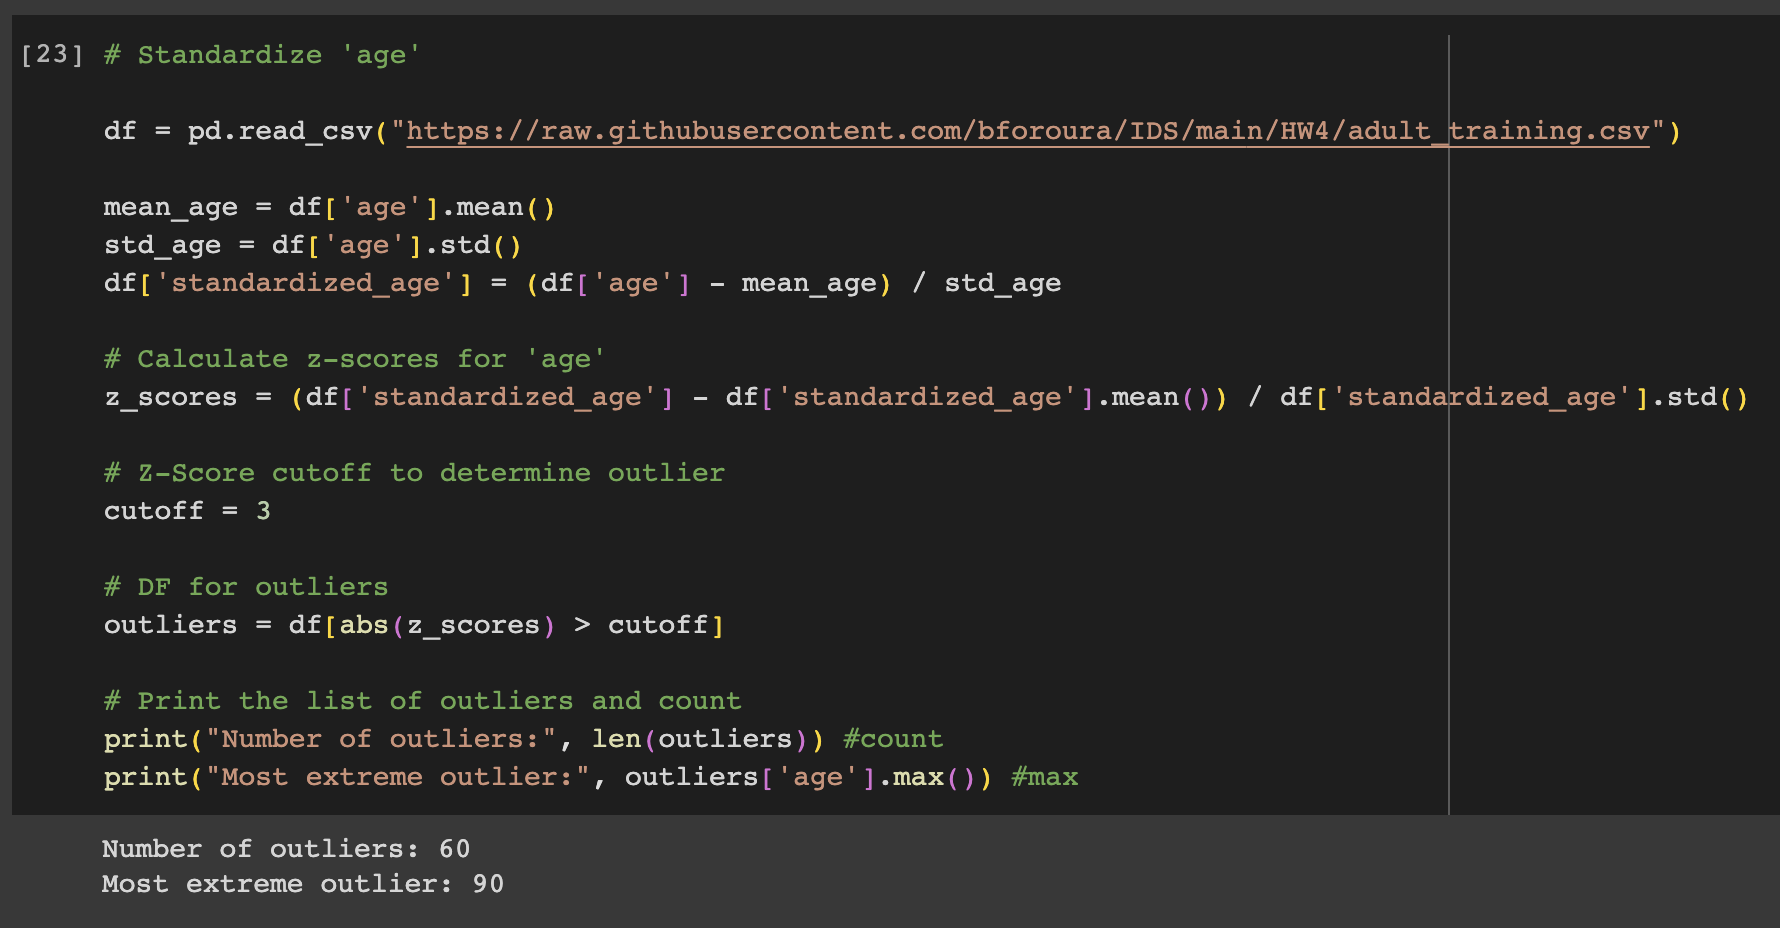

**8) Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.**

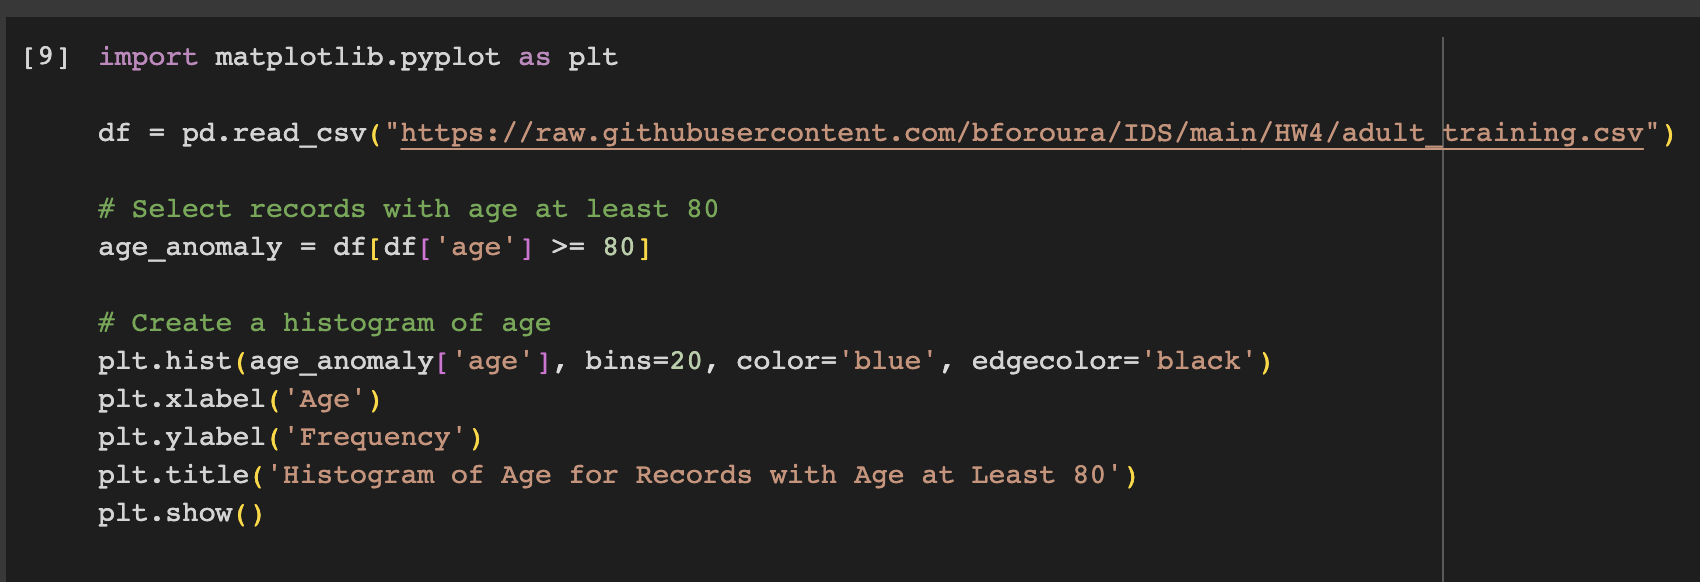

##**Graph Showing Age 90 Anamoly**##

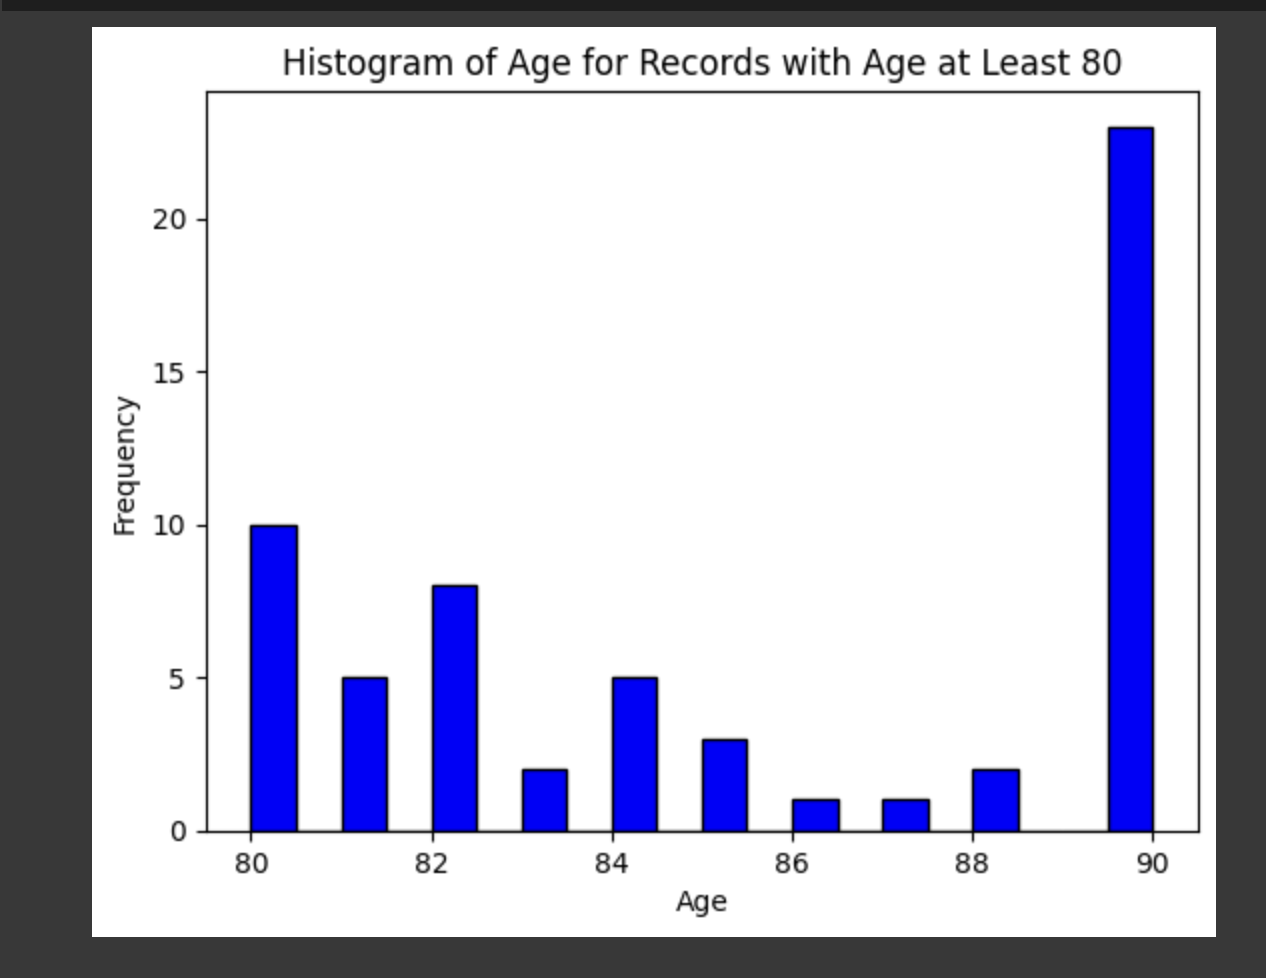

## **9) Summarize Findings**

1) Allowed pd to read csv and named it adultDF. This dataset shows various attributes of adults

2) A simple contingency table of workclass and sex that shows numbers for females and males. The bar plot shows a better visual example of the table with blue and orange colors.

3) Same thing as 2 but with sex and martial status

4) Dataframe that when used will show avaiable adults over 40.

5) Adults over 40 dataframe is used to show tabulated numbers of adults over 40 by marital-status and sex. The numbers are obviously a lot lower knowing they are a subset of the original data.

6) Looking at the numbers for education I can comfortably say there are no outliers or anything out of the norm. The education column is fine.

7) Used z-score to figure out what numbers were outliers and found out it was 90. The graph next question confirmed it.

8) Constructed a histogram to check for anomalies and found 90 as the abormal number in the dataset.  

# **CODE**

In [ ]:
import pandas as pd
import numpy as np


adultDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv");

adultDF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
# Cross tabulation of Workclass and Sex

p_crosstab = pd.crosstab(adultDF.workclass, adultDF.sex)

print(p_crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


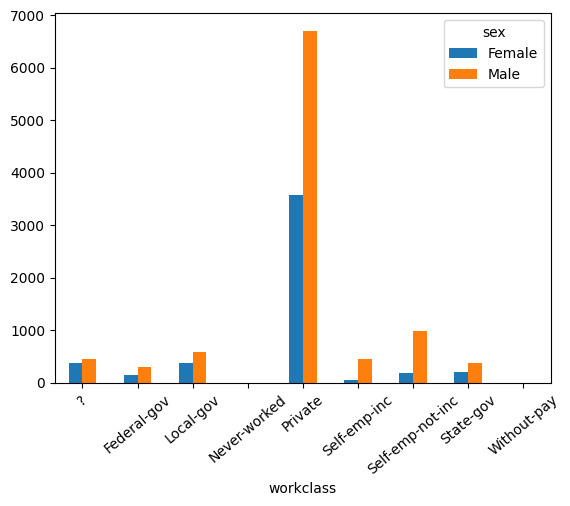

In [ ]:
# Creating barplot

# x label rotation
barplot = p_crosstab.plot.bar(rot=40)

In [ ]:
# Cross tabulation of Martial Status and Sex

p_crosstab2 = pd.crosstab(adultDF['marital-status'], adultDF['sex'])
print(p_crosstab2)

sex                    Female  Male
marital-status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


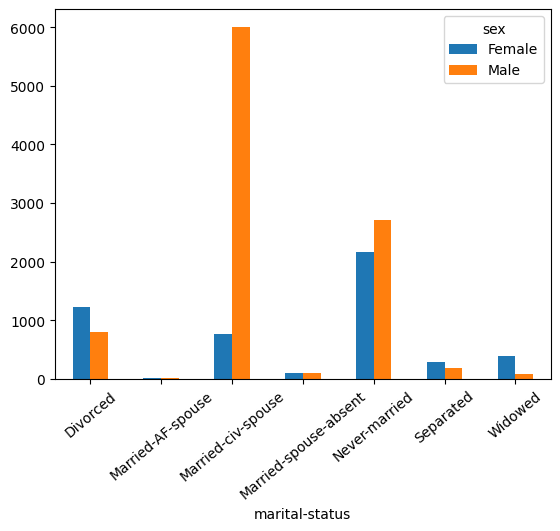

In [ ]:
# Creating barplot

# x label rotation
barplot = p_crosstab2.plot.bar(rot=40)

In [ ]:
#Created New Dataframe
adultOver40 = adultDF[adultDF['age'] > 40]

In [ ]:
# Cross tabulation of Martial Status and Sex acounting for Adult Over 40

p_crosstab3 = pd.crosstab(adultOver40['marital-status'], adultOver40['sex'])
print(p_crosstab3)

sex                    Female  Male
marital-status                     
Divorced                  720   448
Married-civ-spouse        305  3383
Married-spouse-absent      38    47
Never-married             256   315
Separated                 133    74
Widowed                   354    71


In [ ]:
#Oulier Education Check

education_summary = adultDF['education'].describe()
print(education_summary)

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64


In [ ]:
# Standardize 'age'

df = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

mean_age = df['age'].mean()
std_age = df['age'].std()
df['standardized_age'] = (df['age'] - mean_age) / std_age

# Calculate z-scores for 'age'
z_scores = (df['standardized_age'] - df['standardized_age'].mean()) / df['standardized_age'].std()

# Z-Score cutoff to determine outlier
cutoff = 3

# DF for outliers
outliers = df[abs(z_scores) > cutoff]

# Print the list of outliers and count
print("Number of outliers:", len(outliers)) #count
print("Most extreme outlier:", outliers['age'].max()) #max

Number of outliers: 60
Most extreme outlier: 90


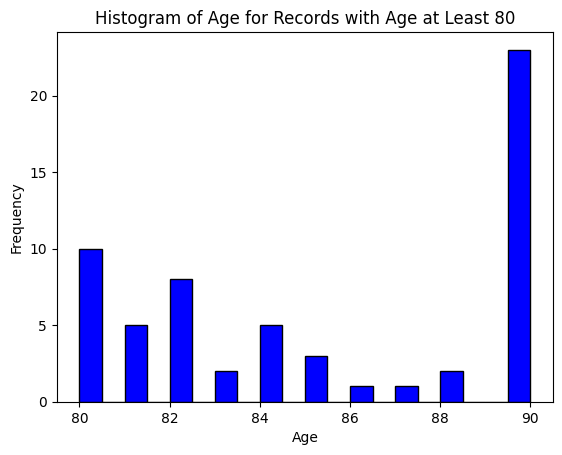

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

# Select records with age at least 80
age_anomaly = df[df['age'] >= 80]

# Create a histogram of age
plt.hist(age_anomaly['age'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age for Records with Age at Least 80')
plt.show()
